___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, Neural Network*** algorithms and ***SMOTE*** technique. Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

At the end of the project, you will have the opportunity to deploy your model by ***Flask API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (flask api) as well as the theory behind Logistic Regression, Random Forest, Neural Network.*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can show the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the SMOTE technique used to increase the sample for unbalanced data. Next, rebuild your Logistic Regression model with SMOTE applied data to observe its effect.

Then, you will use three different algorithms in the model building phase. You have applied Logistic Regression and Random Forest in your previous projects. However, the Deep Learning Neural Network algorithm will appear for the first time.

In the final step, you will deploy your model using ***Flask API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning



    
#### 2. Data Preprocessing

- Scaling
- Train - Test Split


#### 3. Model Building

- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import plotly.express as px
import matplotlib.gridspec as gridspec

plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
# pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_style("whitegrid")

In [8]:
df = pd.read_csv('creditcard.csv')

### Exploratory Data Analysis

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.00,94813.86,47488.15,0.00,54201.50,84692.00,139320.50,172792.00
V1,284807.00,0.00,1.96,-56.41,-0.92,0.02,1.32,2.45
V2,284807.00,0.00,1.65,-72.72,-0.60,0.07,0.80,22.06
V3,284807.00,-0.00,1.52,-48.33,-0.89,0.18,1.03,9.38
V4,284807.00,0.00,1.42,-5.68,-0.85,-0.02,0.74,16.88
V5,284807.00,0.00,1.38,-113.74,-0.69,-0.05,0.61,34.80
V6,284807.00,0.00,1.33,-26.16,-0.77,-0.27,0.40,73.30
V7,284807.00,-0.00,1.24,-43.56,-0.55,0.04,0.57,120.59
V8,284807.00,0.00,1.19,-73.22,-0.21,0.02,0.33,20.01
V9,284807.00,-0.00,1.10,-13.43,-0.64,-0.05,0.60,15.59


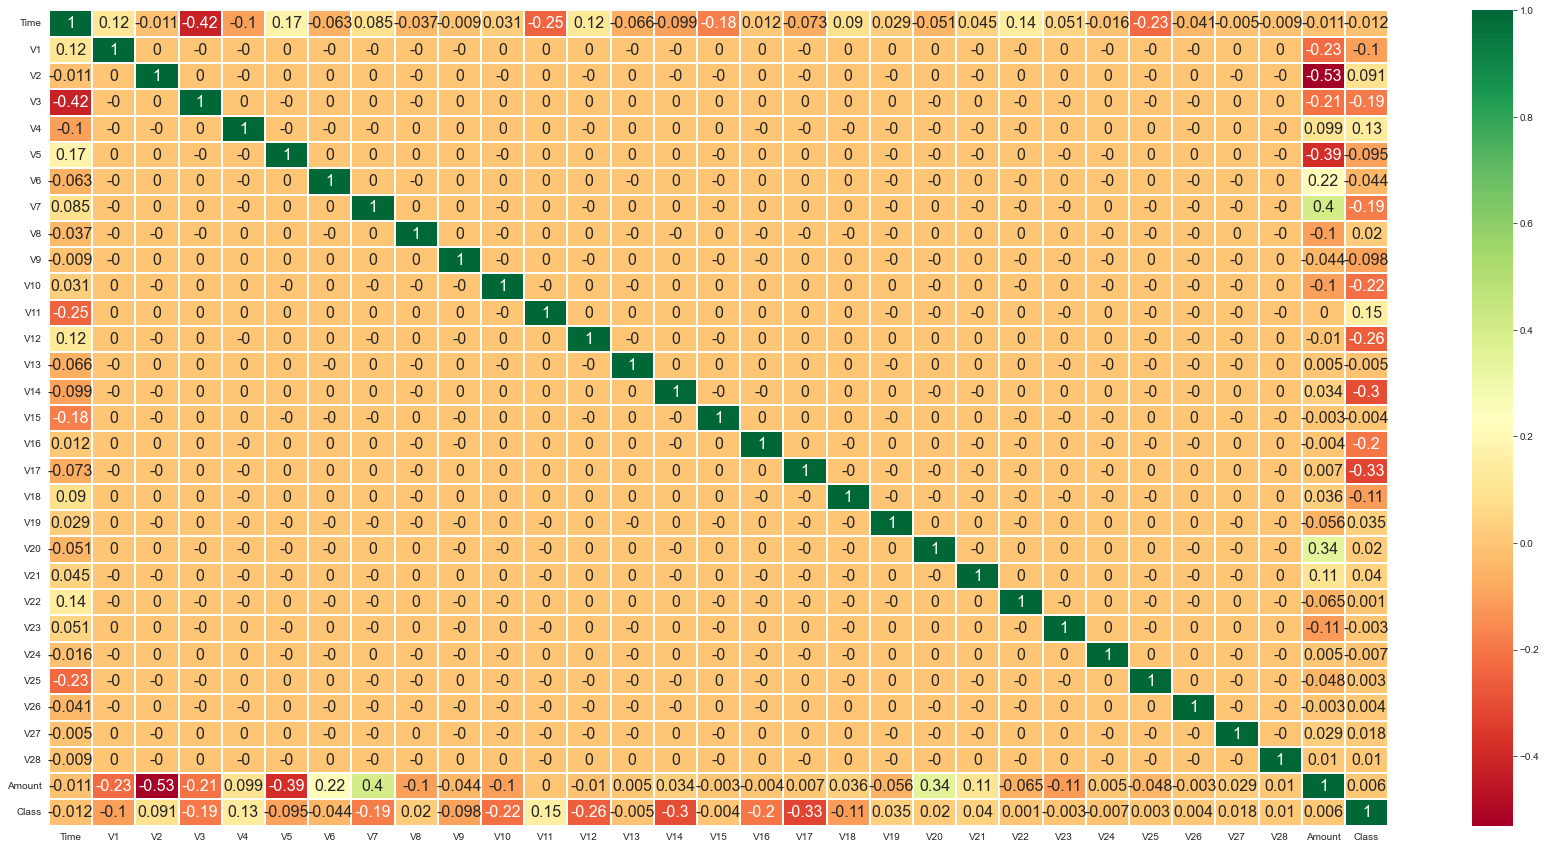

In [ ]:
plt.figure(figsize = (30, 15))
sns.heatmap(round(df.corr(), 3), annot = True, cmap = 'RdYlGn', linewidth = 0.2, annot_kws = {'size' : 16});

In [ ]:
print ("Fraud")
print (df.Time[df.Class == 1].describe())
print ()
print ("NoFraud")
print (df.Time[df.Class == 0].describe())

Fraud
count      492.00
mean     80746.81
std      47835.37
min        406.00
25%      41241.50
50%      75568.50
75%     128483.00
max     170348.00
Name: Time, dtype: float64

NoFraud
count   284315.00
mean     94838.20
std      47484.02
min          0.00
25%      54230.00
50%      84711.00
75%     139333.00
max     172792.00
Name: Time, dtype: float64


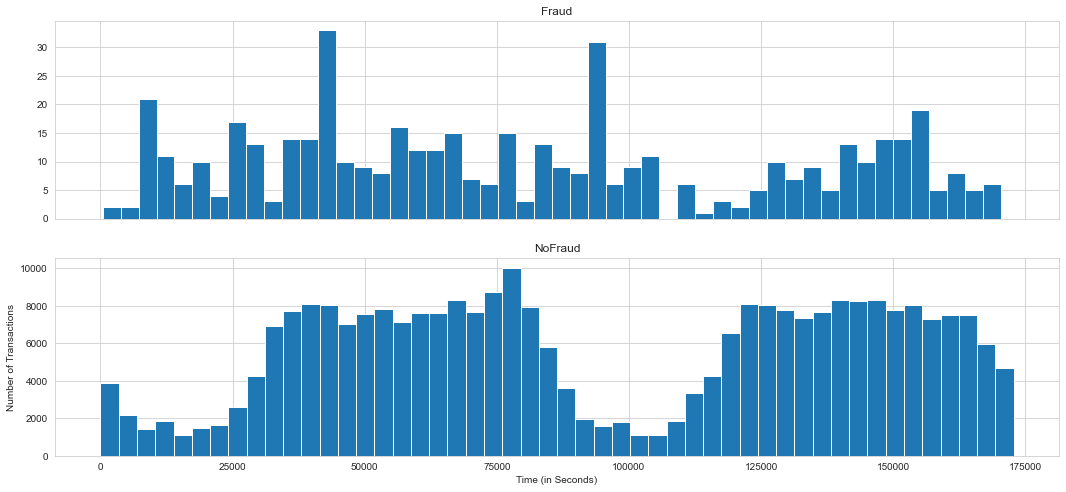

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(18,8))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('NoFraud')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

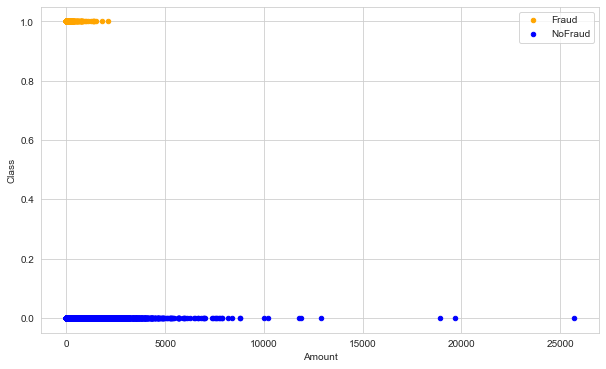

In [ ]:
ax = df.loc[df['Class'] == 1].plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
df.loc[df['Class'] == 0].plot.scatter(x='Amount', y='Class', color='Blue', label='NoFraud', ax=ax)
plt.show()

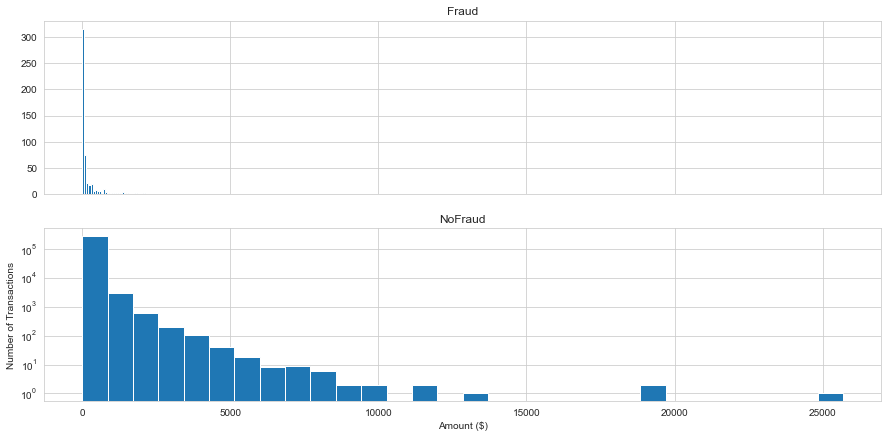

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,7))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('NoFraud')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

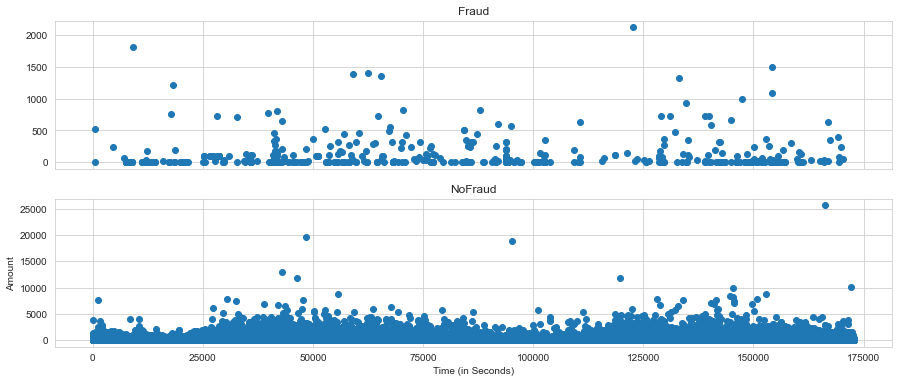

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,6))

ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Fraud')

ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('NoFraud')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

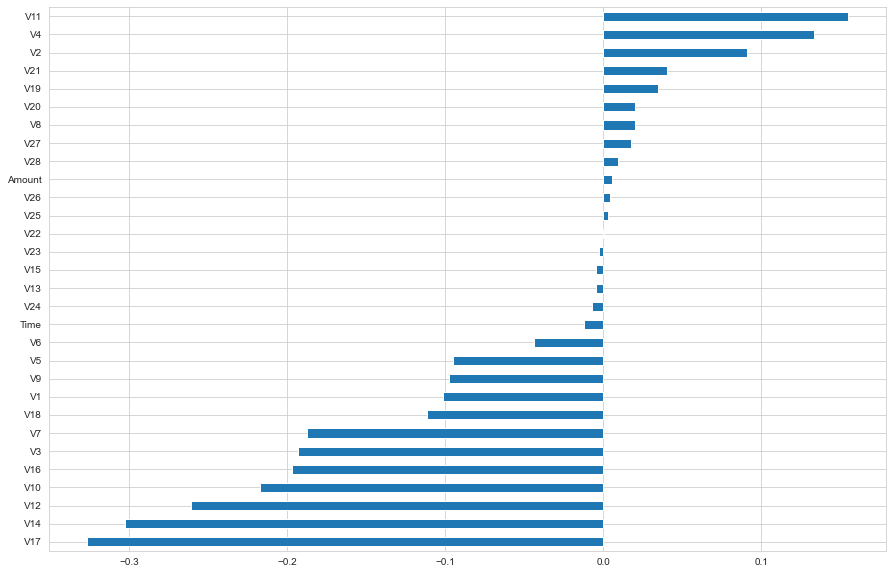

In [ ]:
plt.figure(figsize=(15,10))
df.corr()["Class"].drop("Class").sort_values().plot.barh();

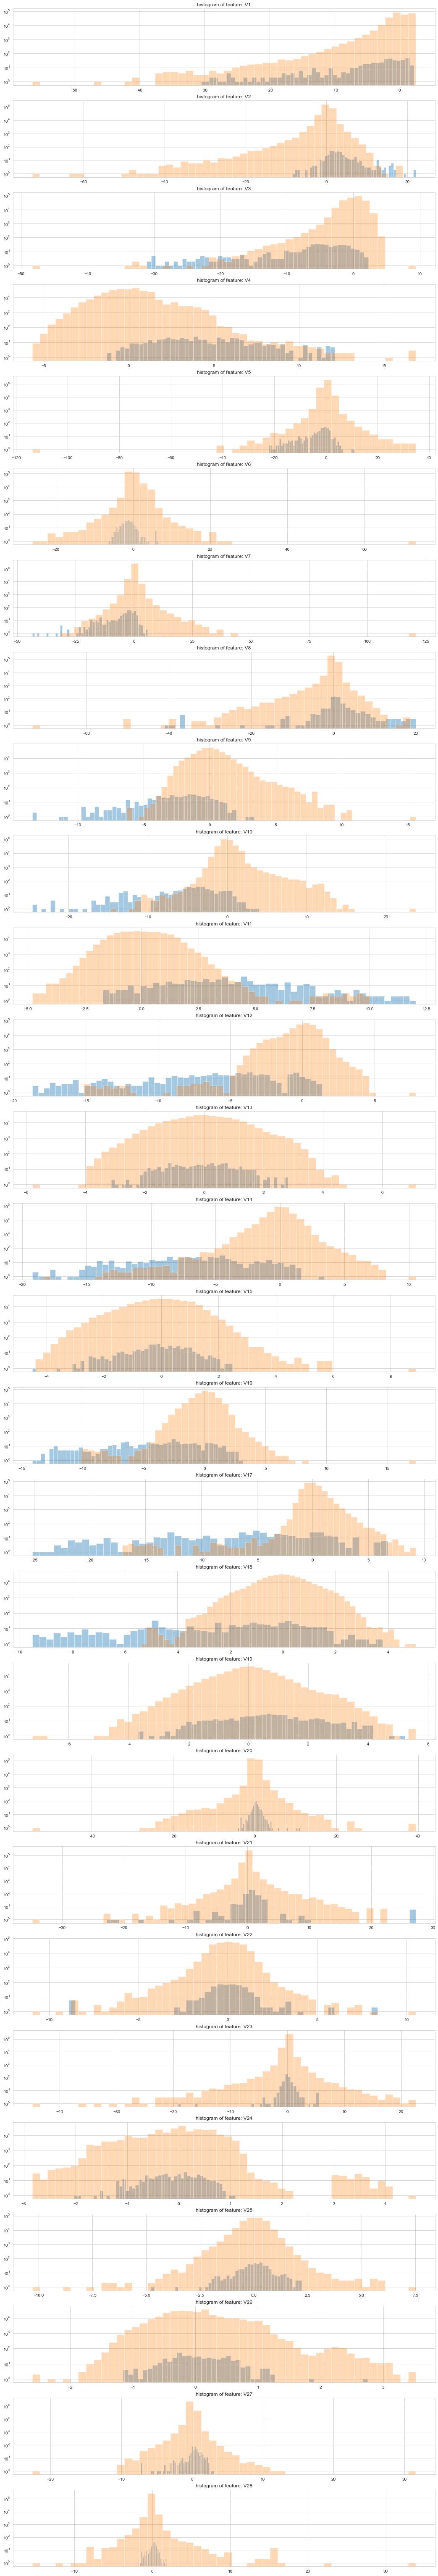

In [ ]:
plt.figure(figsize=(18,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df.drop(['Time', 'Class', 'Amount'], axis=1)):
    ax = plt.subplot(gs[i])
    plt.hist(df[cn][df.Class == 1], bins=50, alpha = 0.4)
    plt.hist(df[cn][df.Class == 0], bins=50, alpha = 0.3)
    plt.yscale('log')
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [ ]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
df.duplicated().sum()

1081

In [ ]:
# df.drop_duplicates(inplace=True)

In [ ]:
fig = px.pie(df, values = df['Class'].value_counts(), 
             names = (df['Class'].value_counts()).index, 
             title = '"Class" Column Distribution')
fig.show()

In [9]:
df[df.Class == 1].describe().T.style.background_gradient(cmap='GnBu')

,count,mean,std,min,25%,50%,75%,max
Time,492.000000,80746.806911,47835.365138,406.000000,41241.500000,75568.500000,128483.000000,170348.000000
V1,492.000000,-4.771948,6.783687,-30.552380,-6.036063,-2.342497,-0.419200,2.132386
V2,492.000000,3.623778,4.291216,-8.402154,1.188226,2.717869,4.971257,22.057729
V3,492.000000,-7.033281,7.110937,-31.103685,-8.643489,-5.075257,-2.276185,2.250210
V4,492.000000,4.542029,2.873318,-1.313275,2.373050,4.177147,6.348729,12.114672
V5,492.000000,-3.151225,5.372468,-22.105532,-4.792835,-1.522962,0.214562,11.095089
V6,492.000000,-1.397737,1.858124,-6.406267,-2.501511,-1.424616,-0.413216,6.474115
V7,492.000000,-5.568731,7.206773,-43.557242,-7.965295,-3.034402,-0.945954,5.802537
V8,492.000000,0.570636,6.797831,-41.044261,-0.195336,0.621508,1.764879,20.007208
V9,492.000000,-2.581123,2.500896,-13.434066,-3.872383,-2.208768,-0.787850,3.353525


### Data Cleaning
Check Missing Values and Outliers

In [ ]:
df.isnull().sum().sum()

0

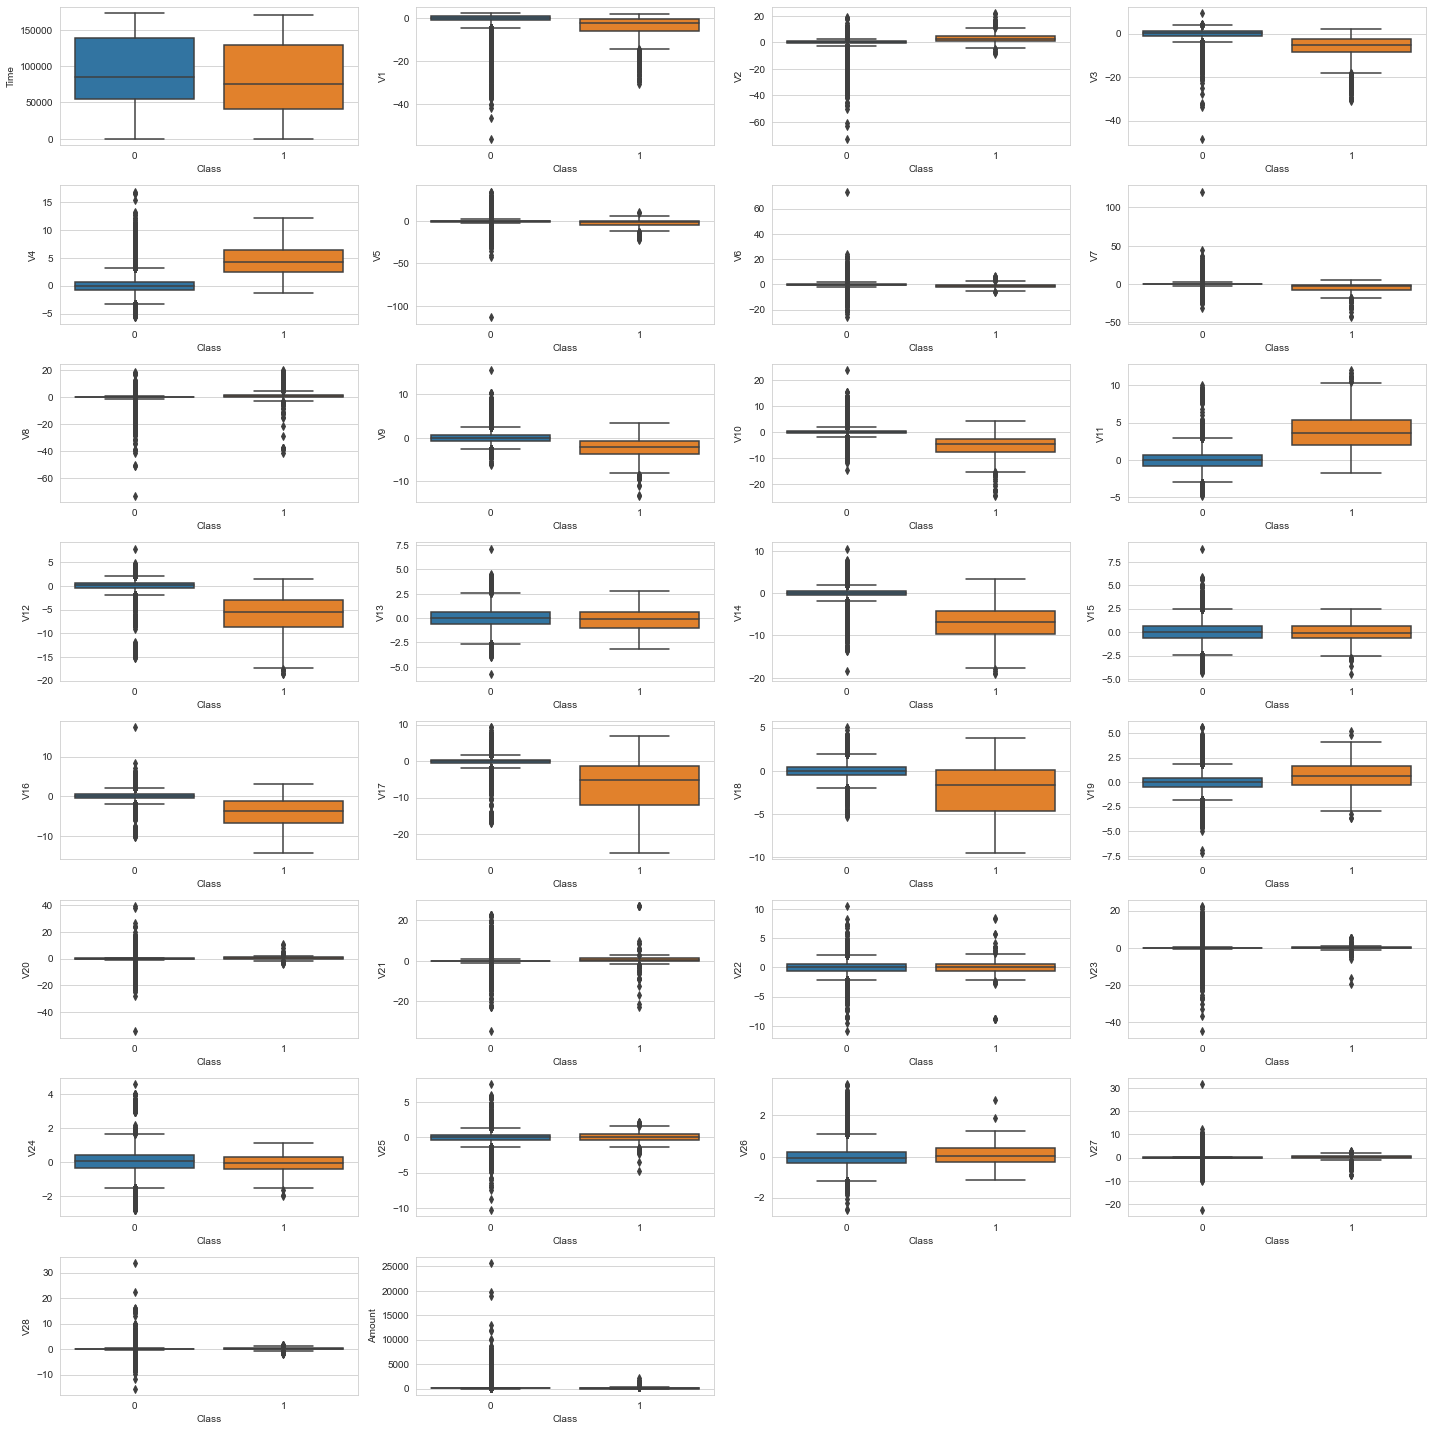

In [ ]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns :
    if feature != 'Class' :
        index += 1
        plt.subplot(8,4,index)
        sns.boxplot(x = 'Class', y = feature, data = df)
plt.tight_layout()
plt.show();

---
---


## 2. Data Preprocessing

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [ ]:
X = df.drop('Class', axis = 1)
y = df.Class

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify=y, random_state=42)

#### Scaling

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [ ]:
operations = [("scaler", StandardScaler()), ('log', LogisticRegression())]

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that you can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression without SMOTE

- The steps you are going to cover for this algorithm are as follows: 

   i. Import Libraries
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Import Libraries***

In [ ]:
from sklearn.linear_model import LogisticRegression

***ii. Model Training***

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score

In [ ]:
pipe_model = Pipeline(steps=operations)

In [ ]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('log', LogisticRegression())])

In [ ]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[28426     6]
 [   15    34]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.85      0.69      0.76        49

    accuracy                           1.00     28481
   macro avg       0.92      0.85      0.88     28481
weighted avg       1.00      1.00      1.00     28481


Train_Set
[[255846     37]
 [   163    280]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255883
           1       0.88      0.63      0.74       443

    accuracy                           1.00    256326
   macro avg       0.94      0.82      0.87    256326
weighted avg       1.00      1.00      1.00    256326



#### Cross Validate

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
operations = [('scaler',StandardScaler()),('log',LogisticRegression())]
model = Pipeline(operations)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.88
test_recall      0.63
test_f1          0.73
test_accuracy    1.00
dtype: float64

***with class_weight***

In [ ]:
class_weights = {0:1, 1:15}

In [ ]:
operations = [("scaler", StandardScaler()), ('log', LogisticRegression(class_weight=class_weights))]

In [ ]:
pipe_model_weight = Pipeline(steps=operations)

In [ ]:
pipe_model_weight.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log', LogisticRegression(class_weight={0: 1, 1: 15}))])

In [ ]:
eval_metric(pipe_model_weight, X_train, y_train, X_test, y_test)

Test_Set
[[28405    27]
 [    8    41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.60      0.84      0.70        49

    accuracy                           1.00     28481
   macro avg       0.80      0.92      0.85     28481
weighted avg       1.00      1.00      1.00     28481


Train_Set
[[255738    145]
 [    76    367]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255883
           1       0.72      0.83      0.77       443

    accuracy                           1.00    256326
   macro avg       0.86      0.91      0.88    256326
weighted avg       1.00      1.00      1.00    256326



In [ ]:
operations = [('scaler',StandardScaler()),('log',LogisticRegression(class_weight=class_weights))]
model = Pipeline(operations)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.71
test_recall      0.82
test_f1          0.76
test_accuracy    1.00
dtype: float64

***iii. Prediction and Model Evaluating***

In [ ]:
y_pred=pipe_model_weight.predict(X_test)

In [ ]:
y_pred_proba = pipe_model_weight.predict_proba(X_test)

In [ ]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,0,pred,pred_proba
90599,63085.00,-0.17,0.98,0.84,0.52,0.98,0.06,0.99,-0.35,-0.39,...,-0.36,-0.99,-0.10,-0.29,-0.12,-0.07,12.92,0,0,0.00
122307,76509.00,0.95,-0.33,1.10,0.95,-0.20,2.04,-1.09,0.88,0.69,...,0.04,-1.02,0.13,-0.14,0.13,0.01,1.00,0,0,0.00
38572,39442.00,-0.62,0.74,1.26,-1.44,-0.19,-0.63,0.33,0.20,0.22,...,-0.04,0.01,-0.22,0.73,0.27,0.11,0.69,0,0,0.00
32458,36812.00,0.98,-0.29,-0.15,1.13,-0.04,0.07,0.10,0.06,0.30,...,-0.29,-0.80,0.60,-0.21,-0.00,0.03,144.00,0,0,0.01
70324,53821.00,1.12,0.22,0.36,1.01,-0.15,-0.29,0.05,0.04,-0.28,...,-0.07,0.23,0.55,-0.33,0.02,0.01,17.74,0,0,0.00
150452,93384.00,2.21,-1.31,-0.65,-1.45,-1.09,-0.17,-1.31,-0.16,-0.25,...,0.26,0.71,-0.26,-0.28,-0.01,-0.05,37.50,0,0,0.00
78420,57517.00,1.22,0.47,-0.50,0.83,-0.11,-1.30,0.18,-0.07,-0.14,...,-0.05,0.37,0.45,0.35,-0.05,0.03,0.76,0,0,0.02
192448,129696.00,-7.00,5.78,-4.05,-0.91,-2.37,5.09,-10.39,-21.55,-1.74,...,1.82,-0.50,-0.44,-0.35,0.13,0.18,115.57,0,0,0.00
103788,68794.00,-0.45,0.29,0.78,0.54,2.08,4.25,-0.92,1.14,0.08,...,-0.18,1.03,-0.34,-0.23,0.15,0.15,1.00,0,0,0.00
24130,33082.00,-0.86,0.99,-0.25,-0.76,2.63,3.51,0.17,-0.07,-1.02,...,-0.16,1.00,0.21,0.33,-0.05,0.06,44.90,0,0,0.00


Datadaki bir ornekten prediction :

In [ ]:
df[df.Class == 1].head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.00,-2.31,1.95,-1.61,4.00,-0.52,-1.43,-2.54,1.39,-2.77,...,0.52,-0.04,-0.47,0.32,0.04,0.18,0.26,-0.14,0.00,1
623,472.00,-3.04,-3.16,1.09,2.29,1.36,-1.06,0.33,-0.07,-0.27,...,0.66,0.44,1.38,-0.29,0.28,-0.15,-0.25,0.04,529.00,1
4920,4462.00,-2.30,1.76,-0.36,2.33,-0.82,-0.08,0.56,-0.40,-0.24,...,-0.29,-0.93,0.17,-0.09,-0.16,-0.54,0.04,-0.15,239.93,1
6108,6986.00,-4.40,1.36,-2.59,2.68,-1.13,-1.71,-3.50,-0.25,-0.25,...,0.57,0.18,-0.44,-0.05,0.25,-0.66,-0.83,0.85,59.00,1
6329,7519.00,1.23,3.02,-4.30,4.73,3.62,-1.36,1.71,-0.50,-1.28,...,-0.38,-0.70,-0.66,-1.63,1.49,0.57,-0.01,0.15,1.00,1


In [ ]:
pipe_model_weight.predict(X.loc[[541]])    # True prediction

array([1], dtype=int64)

In [ ]:
pipe_model_weight.predict(X.loc[[623]])      # Wrong prediction

array([0], dtype=int64)

***matthews_corrcoef -->*** Alinan gercek degerler ile tahmin degerleri arasindaki corr

***matthews_corrcoef ve cohen_kappa_score*** dengesiz datasetlerinde bakilan skorlardir.

In [ ]:
from sklearn.metrics import matthews_corrcoef

y_pred = pipe_model_weight.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7097139581953948

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7002552612104896


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


In [ ]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, average_precision_score

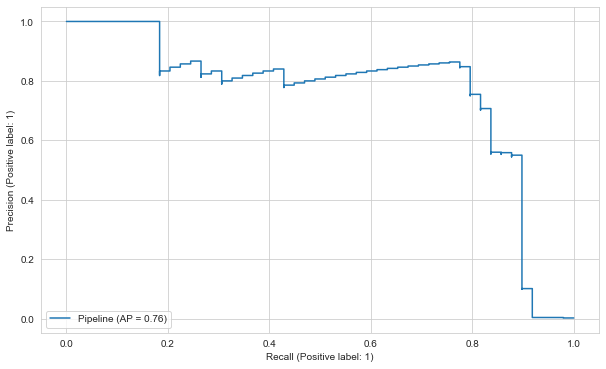

In [ ]:
plot_precision_recall_curve(pipe_model_weight, X_test, y_test);

In [ ]:
y_pred_proba = pipe_model.predict_proba(X_train)
average_precision_score(y_train, y_pred_proba[:,1])

0.7713632808217631

***v. Apply and Plot StratifiedKFold***

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [ ]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.09005958925486358

In [ ]:
from sklearn.model_selection import StratifiedKFold    # Modeli kaç parçaya ayırmak istiyorsak ona göre index numaraları belirler.

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)       # Index no'ları her işlemden sonra sıfırlaması için.
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [ ]:
CV(10, pipe_model_weight, pd.DataFrame(X_train), y_train, 0.5)

Accuracy      99.91%  std 0.02%
Precision-1   70.70%  std 5.81%
Recall-1      82.64%  std 5.84%
F1_score-1    75.94%  std 3.76%


In [ ]:
CV(10, pipe_model_weight, pd.DataFrame(X_train), y_train, optimal_threshold)

Accuracy      99.49%  std 0.06%
Precision-1   23.79%  std 2.23%
Recall-1      86.69%  std 4.19%
F1_score-1    37.26%  std 2.74%


- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class recall is not sufficient, apply **SMOTE**.

### Apply SMOTE (Synthetic Minority Oversampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [ ]:
y_train.value_counts()

0    255883
1       443
dtype: int64

In [ ]:
#over = SMOTE(sampling_strategy=0.1)
#under = RandomUnderSampler(sampling_strategy=0.5)

In [ ]:
over = SMOTE(sampling_strategy={1: 1000})
under = RandomUnderSampler(sampling_strategy={0: 30000})

In [ ]:
X_resampled, y_resampled = over.fit_resample(X_train, y_train)

In [ ]:
X_resampled, y_resampled = under.fit_resample(X_resampled, y_resampled)

In [ ]:
y_resampled.value_counts()

0    30000
1     1000
dtype: int64

### Logistic Regression with SMOTE

- The steps you are going to cover for this algorithm are as follows:
   
   *i. Train-Test Split (Again)*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Train-Test Split (Again)***

Use SMOTE applied data.

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [ ]:
class_weight_smote = {0:1, 1:1}

In [ ]:
operations = [('o', over), ('u', under), ("scaler", StandardScaler()), 
              ('log', LogisticRegression(class_weight=class_weight_smote, random_state = 42))]

In [ ]:
smote_pipeline_log = imbpipeline(steps=operations)

***ii. Model Training***

In [ ]:
smote_pipeline_log.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={1: 1000})),
                ('u', RandomUnderSampler(sampling_strategy={0: 30000})),
                ('scaler', StandardScaler()),
                ('log',
                 LogisticRegression(class_weight={0: 1, 1: 1},
                                    random_state=42))])

***iii. Prediction and Model Evaluating***

In [ ]:
eval_metric(smote_pipeline_log, X_train, y_train, X_test, y_test)

Test_Set
[[28403    29]
 [    8    41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.59      0.84      0.69        49

    accuracy                           1.00     28481
   macro avg       0.79      0.92      0.84     28481
weighted avg       1.00      1.00      1.00     28481


Train_Set
[[255704    179]
 [    74    369]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255883
           1       0.67      0.83      0.74       443

    accuracy                           1.00    256326
   macro avg       0.84      0.92      0.87    256326
weighted avg       1.00      1.00      1.00    256326



#### Cross Validate

In [ ]:
model = smote_pipeline_log = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy   1.00
test_recall     0.83
test_f1         0.75
dtype: float64

***iv.  Plot Precision and Recall Curve***


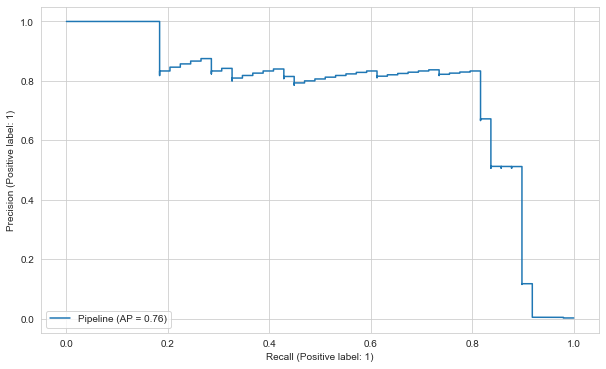

In [ ]:
plot_precision_recall_curve(smote_pipeline_log, X_test, y_test);

In [ ]:
y_pred_proba = smote_pipeline_log.predict_proba(X_train)
average_precision_score(y_train, y_pred_proba[:,1])

0.7693637841593863

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [ ]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.9631555208567537

***v. Apply and Plot StratifiedKFold***

In [ ]:
 CV(10, smote_pipeline_log, pd.DataFrame(X_train), y_train, optimal_threshold)

Accuracy      99.93%  std 0.01%
Precision-1   82.43%  std 3.70%
Recall-1      78.36%  std 6.19%
F1_score-1    80.17%  std 3.52%


In [ ]:
 CV(10, smote_pipeline_log, pd.DataFrame(X_train), y_train, 0.5)

Accuracy      99.90%  std 0.02%
Precision-1   68.72%  std 7.69%
Recall-1      82.64%  std 5.31%
F1_score-1    74.63%  std 4.22%


### Random Forest Classifier with SMOTE

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating*
   
   *iii. Plot Precision and Recall Curve*
   
   *iv. Apply and Plot StratifiedKFold*
   

***i. Model Training***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [ ]:
class_weights = {0: 1, 1: 1}

In [ ]:
over = SMOTE(sampling_strategy={1: 1000})
under = RandomUnderSampler(sampling_strategy={0: 20000})

In [ ]:
rf_operations = [('o', over), ('u', under), ('rf', RandomForestClassifier(class_weight=class_weights, max_depth=7, random_state=42))]
smote_rf_model = imbpipeline(steps=rf_operations)

In [ ]:
smote_rf_model.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={1: 1000})),
                ('u', RandomUnderSampler(sampling_strategy={0: 20000})),
                ('rf',
                 RandomForestClassifier(class_weight={0: 1, 1: 1}, max_depth=7,
                                        random_state=42))])

In [ ]:
eval_metric(smote_rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[56825    39]
 [   12    86]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.69      0.88      0.77        98

    accuracy                           1.00     56962
   macro avg       0.84      0.94      0.89     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227349    102]
 [    63    331]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.76      0.84      0.80       394

    accuracy                           1.00    227845
   macro avg       0.88      0.92      0.90    227845
weighted avg       1.00      1.00      1.00    227845



In [ ]:
model = RandomForestClassifier(class_weight = class_weights, max_depth=7, random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy    1.00
test_precision   0.96
test_recall      0.75
test_f1          0.84
dtype: float64

In [ ]:
smote_rf_model.predict(X.loc[[541]])      # True prediction

array([1], dtype=int64)

In [ ]:
smote_rf_model.predict(X.loc[[623]])        # Wrong prediction

array([0], dtype=int64)

***ii. Prediction and Model Evaluating***

***iii. Plot Precision and Recall Curve***


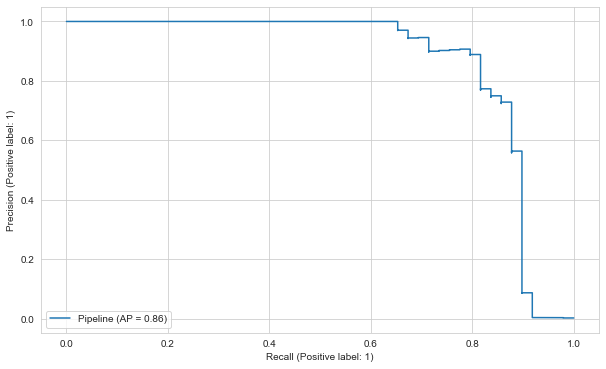

In [ ]:
plot_precision_recall_curve(smote_rf_model, X_test, y_test);

***iv. Apply and Plot StratifiedKFold***

In [ ]:
y_pred_proba = smote_rf_model.predict_proba(X_train)
average_precision_score(y_train, y_pred_proba[:,1])

0.8587061008669755

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [ ]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.917286306329967

In [ ]:
CV(10, smote_rf_model, pd.DataFrame(X_train), y_train, optimal_threshold)

Accuracy      99.94%  std 0.01%
Precision-1   90.85%  std 3.38%
Recall-1      73.63%  std 6.69%
F1_score-1    81.06%  std 3.67%


In [ ]:
CV(10, smote_rf_model, pd.DataFrame(X_train), y_train, 0.5)

Accuracy      99.93%  std 0.01%
Precision-1   77.51%  std 3.32%
Recall-1      83.99%  std 4.52%
F1_score-1    80.50%  std 2.38%


### SHAP

In [ ]:
pip install shap

     |████████████████████████████████| 564 kB 5.2 MB/s eta 0:00:01


In [ ]:
import shap

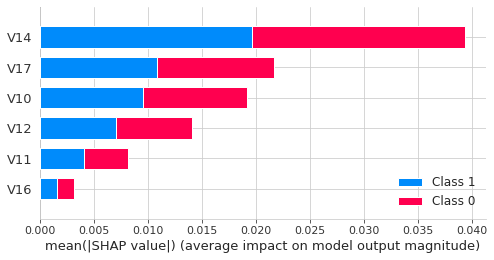

In [ ]:
explainer = shap.TreeExplainer(smote_rf_model["rf"])
shap_values = explainer.shap_values(X_test,approximate=True)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
feature = ['V14', 'V10', 'V17', 'V12', 'V16', 'V11']

In [ ]:
X2 = df[feature]
y = df.Class

In [ ]:
X2.shape

(284807, 6)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.1, random_state=42, stratify =y)

***Logistic Regression after Shap***

In [ ]:
class_weights = {0:1, 1:12}
operations = [("scaler", StandardScaler()), ('log', LogisticRegression(class_weight=class_weights))]
pipe_shap_model = Pipeline(steps=operations)
pipe_shap_model.fit(X_train2, y_train2)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log', LogisticRegression(class_weight={0: 1, 1: 12}))])

In [ ]:
eval_metric(pipe_shap_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[28414    18]
 [    8    41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.69      0.84      0.76        49

    accuracy                           1.00     28481
   macro avg       0.85      0.92      0.88     28481
weighted avg       1.00      1.00      1.00     28481


Train_Set
[[255784     99]
 [    83    360]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255883
           1       0.78      0.81      0.80       443

    accuracy                           1.00    256326
   macro avg       0.89      0.91      0.90    256326
weighted avg       1.00      1.00      1.00    256326



### Random Forest after Shap

In [ ]:
shap_rf_model = RandomForestClassifier(max_depth=7, random_state=42)

In [ ]:
shap_rf_model.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=7, random_state=42)

In [ ]:
eval_metric(shap_rf_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[28429     3]
 [   10    39]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.93      0.80      0.86        49

    accuracy                           1.00     28481
   macro avg       0.96      0.90      0.93     28481
weighted avg       1.00      1.00      1.00     28481


Train_Set
[[255865     18]
 [    77    366]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255883
           1       0.95      0.83      0.89       443

    accuracy                           1.00    256326
   macro avg       0.98      0.91      0.94    256326
weighted avg       1.00      1.00      1.00    256326



***with class_weight***

In [ ]:
class_weights = {0:1, 1:10}

In [ ]:
shap_rf_model_weight = RandomForestClassifier(class_weight = class_weights, max_depth=7, random_state=42)

In [ ]:
shap_rf_model_weight.fit(X_train2, y_train2)

RandomForestClassifier(class_weight={0: 1, 1: 10}, max_depth=7, random_state=42)

In [ ]:
eval_metric(shap_rf_model_weight, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[28425     7]
 [    8    41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.85      0.84      0.85        49

    accuracy                           1.00     28481
   macro avg       0.93      0.92      0.92     28481
weighted avg       1.00      1.00      1.00     28481


Train_Set
[[255839     44]
 [    73    370]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255883
           1       0.89      0.84      0.86       443

    accuracy                           1.00    256326
   macro avg       0.95      0.92      0.93    256326
weighted avg       1.00      1.00      1.00    256326



### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

***ii. Define Model***

In [ ]:
X2 = df[feature]             
y = df.Class.values
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X2,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=seed)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
tf.random.set_seed(seed)

model_ann = Sequential()

model_ann.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model_ann.add(Dense(15, activation = "relu"))
model_ann.add(Dense(1, activation = "sigmoid"))

***iii. Compile Model***

In [ ]:
model_ann.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

***iv. Fit Model***

In [ ]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=5, restore_best_weights = True)

In [ ]:
model_ann.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 200, callbacks=[early_stop], verbose=1)

Epoch 1/200
6409/6409 [==============================] - 18s 3ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 2/200
6409/6409 [==============================] - 13s 2ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 3/200
6409/6409 [==============================] - 13s 2ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 4/200
6409/6409 [==============================] - 13s 2ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0025 - val_accuracy: 0.9996
Epoch 5/200
6409/6409 [==============================] - 13s 2ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0025 - val_accuracy: 0.9996
Epoch 6/200
6409/6409 [==============================] - 13s 2ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9996
Epoch 7/200
6409/6409 [==============================] - 13s 2ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0029 -

In [ ]:
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                210       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 691
Trainable params: 691
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss_df = pd.DataFrame(model_ann.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.00,1.00,0.00,1.00
1,0.00,1.00,0.00,1.00
2,0.00,1.00,0.00,1.00
3,0.00,1.00,0.00,1.00
4,0.00,1.00,0.00,1.00


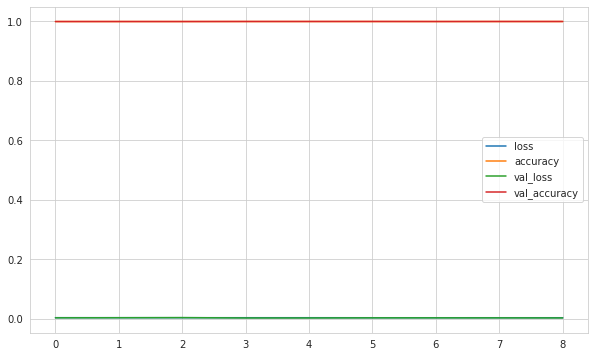

In [ ]:
loss_df.plot();

***v. Prediction and Model Evaluating***

In [ ]:
model_ann.evaluate(X_test, y_test, verbose=0) 

[0.003429032862186432, 0.9992802143096924]

In [ ]:
loss, accuracy = model_ann.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.003429032862186432
accuracy :  0.9992802143096924


In [ ]:
#0.1 test size
y_pred = (model_ann.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56841    23]
 [   18    80]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.82      0.80        98

    accuracy                           1.00     56962
   macro avg       0.89      0.91      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
y_pred = (model_ann.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56640    11]
 [   23    72]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.87      0.76      0.81        95

    accuracy                           1.00     56746
   macro avg       0.93      0.88      0.90     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
from sklearn.metrics import precision_recall_curve

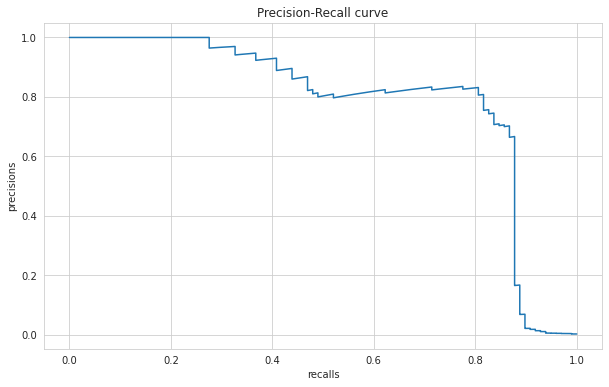

In [ ]:
y_pred_proba = model_ann.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [ ]:
average_precision_score(y_test, y_pred_proba)

0.7867760898494589

***with class_weight***

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [ ]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
from sklearn.utils import class_weight

# class_weights = class_weight.compute_class_weight('balanced',
#                                                  classes=np.unique(y_train),
#                                                 y=y_train)

class_weights = {0 : 1, 1 : 10}

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 200, callbacks=[early_stop], class_weight=class_weights, verbose=1)

Epoch 1/200
7210/7210 [==============================] - 54s 7ms/step - loss: 0.0333 - accuracy: 0.9969 - val_loss: 0.0091 - val_accuracy: 0.9988
Epoch 2/200
7210/7210 [==============================] - 16s 2ms/step - loss: 0.0206 - accuracy: 0.9993 - val_loss: 0.0057 - val_accuracy: 0.9991
Epoch 3/200
7210/7210 [==============================] - 17s 2ms/step - loss: 0.0200 - accuracy: 0.9993 - val_loss: 0.0065 - val_accuracy: 0.9992
Epoch 4/200
7210/7210 [==============================] - 16s 2ms/step - loss: 0.0196 - accuracy: 0.9993 - val_loss: 0.0056 - val_accuracy: 0.9991
Epoch 5/200
7210/7210 [==============================] - 16s 2ms/step - loss: 0.0195 - accuracy: 0.9993 - val_loss: 0.0089 - val_accuracy: 0.9991
Epoch 6/200
7210/7210 [==============================] - 16s 2ms/step - loss: 0.0192 - accuracy: 0.9993 - val_loss: 0.0052 - val_accuracy: 0.9993
Epoch 7/200
7210/7210 [==============================] - 16s 2ms/step - loss: 0.0193 - accuracy: 0.9993 - val_loss: 0.0051 -

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 30)                210       
                                                                 
 dense_11 (Dense)            (None, 15)                465       
                                                                 
 dense_12 (Dense)            (None, 8)                 128       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 812
Trainable params: 812
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.03,1.00,0.01,1.00
1,0.02,1.00,0.01,1.00
2,0.02,1.00,0.01,1.00
3,0.02,1.00,0.01,1.00
4,0.02,1.00,0.01,1.00


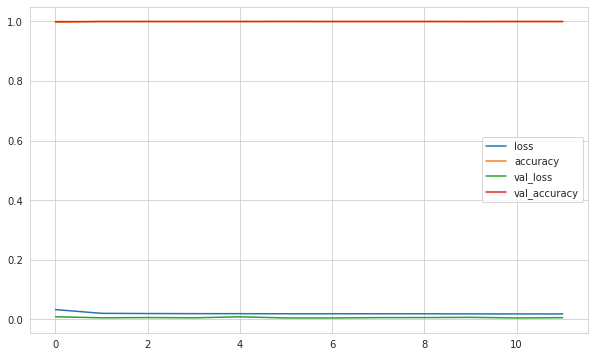

In [ ]:
loss_df.plot();

***v. Prediction and Model Evaluating***

In [ ]:
model.evaluate(X_test, y_test, verbose=0)    

[0.004735706374049187, 0.9991222023963928]

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.004735706374049187
accuracy :  0.9991222023963928


In [ ]:
#with class_weight = 10
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56838    26]
 [   16    82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.84      0.80        98

    accuracy                           1.00     56962
   macro avg       0.88      0.92      0.90     56962
weighted avg       1.00      1.00      1.00     56962



***vi. Plot Precision and Recall Curve***

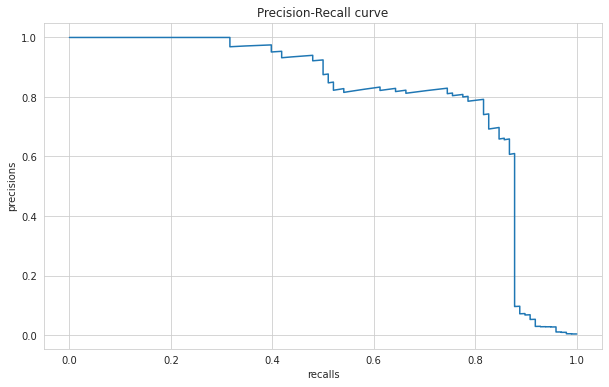

In [ ]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [ ]:
average_precision_score(y_test, y_pred_proba)

0.7155716143215196

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Flask API.

### Save and Export the Model as .pkl


### Logistic Regression and RF :

In [ ]:
class_weights = {0 : 1, 1 : 10}

In [ ]:
operations = [("scaler", StandardScaler()), ('log', LogisticRegression(class_weight=class_weights))]
log_model_final = Pipeline(steps=operations)
log_model_final.fit(X2, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log', LogisticRegression(class_weight={0: 1, 1: 40}))])

In [ ]:
rf_model_final = RandomForestClassifier(class_weight = class_weights, max_depth=7)
rf_model_final.fit(X2,y)

RandomForestClassifier(class_weight={0: 1, 1: 10}, max_depth=7)

In [ ]:
import joblib

In [ ]:
joblib.dump(rf_model_final, open('rf_model_final.pkl', 'wb'))
#joblib.dump(log_model_final, open('log_model_final.pkl', 'wb'))

### ANN :

In [ ]:
joblib.dump(scaler, open('scaler', 'wb'))

In [ ]:
tf.random.set_seed(seed)

final_model_ann = Sequential()

final_model_ann.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
final_model_ann.add(Dense(15, activation = "relu"))
final_model_ann.add(Dense(1, activation = "sigmoid"))

final_model_ann.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=15, restore_best_weights = True)

from sklearn.utils import class_weight
class_weights = {0 : 1, 1 : 40}

In [ ]:
final_model_ann.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 200, callbacks=[early_stop], class_weight=class_weights, verbose=1)

Epoch 1/200
7094/7094 [==============================] - 21s 3ms/step - loss: 0.0786 - accuracy: 0.9979 - val_loss: 0.0107 - val_accuracy: 0.9993
Epoch 2/200
7094/7094 [==============================] - 19s 3ms/step - loss: 0.0508 - accuracy: 0.9979 - val_loss: 0.0146 - val_accuracy: 0.9992
Epoch 3/200
7094/7094 [==============================] - 19s 3ms/step - loss: 0.0486 - accuracy: 0.9981 - val_loss: 0.0120 - val_accuracy: 0.9992
Epoch 4/200
7094/7094 [==============================] - 25s 4ms/step - loss: 0.0477 - accuracy: 0.9985 - val_loss: 0.0162 - val_accuracy: 0.9984
Epoch 5/200
7094/7094 [==============================] - 19s 3ms/step - loss: 0.0467 - accuracy: 0.9984 - val_loss: 0.0087 - val_accuracy: 0.9991
Epoch 6/200
7094/7094 [==============================] - 20s 3ms/step - loss: 0.0466 - accuracy: 0.9980 - val_loss: 0.0092 - val_accuracy: 0.9993
Epoch 7/200
7094/7094 [==============================] - 27s 4ms/step - loss: 0.0459 - accuracy: 0.9986 - val_loss: 0.0109 -

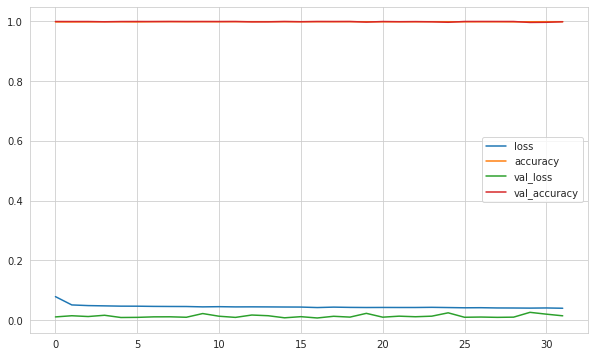

In [ ]:
loss_df = pd.DataFrame(final_model_ann.history.history)
loss_df.plot();

In [ ]:
loss, accuracy = final_model_ann.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.0071617234498262405
accuracy :  0.9992774724960327


In [ ]:
y_pred = (final_model_ann.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56630    21]
 [   20    75]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.78      0.79      0.79        95

    accuracy                           1.00     56746
   macro avg       0.89      0.89      0.89     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
# Saving the model for Future Inferences

model_json = final_model_ann.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
final_model_ann.save_weights("model.h5")

In [ ]:
X2.loc[541]

V14   -4.289
V10   -2.772
V17   -2.830
V12   -2.900
V16   -1.141
V4     3.998
Name: 541, dtype: float64

In [ ]:
rf_model_final.predict(X2.loc[[541]])      

array([1])

In [ ]:
log_model_final.predict(X2.loc[[541]])      

array([1])

In [ ]:
final_model_ann.predict(X2.loc[[541]])      

array([[0.96027666]], dtype=float32)

In [ ]:
X2.loc[623]

V14   -1.692
V10   -0.839
V17    0.600
V12   -0.503
V16    0.667
V4     2.289
Name: 623, dtype: float64

In [ ]:
rf_model_final.predict(X2.loc[[623]])      

array([0])

In [ ]:
log_model_final.predict(X2.loc[[623]])      

array([0])

In [ ]:
final_model_ann.predict(X2.loc[[623]])      

array([[0.16859126]], dtype=float32)

### Save and Export Variables as .pkl

In [ ]:
columns = X2.columns
columns

Index(['V14', 'V10', 'V17', 'V12', 'V16', 'V4'], dtype='object')

In [ ]:
joblib.dump(columns, open('columns', 'wb'))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___